In [2]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6e514244223a747005a36f8cfc9d1eed666574a1447cb

In [3]:
#Q1
import pandas as pd
import numpy as np
import pandas_profiling as pp

# Load the dataset into a pandas DataFrame
df = pd.read_csv("911_calls.csv")

# Generate a profile report of the dataset
profile = pp.ProfileReport(df)

# Extract summary statistics and metadata from the profile report
summary = profile.get_description()

# Create a dataset profile table
profile_table = pd.DataFrame(columns=["Attribute", "Type", "Min", "Max", "Mean", "Median", "Std. Dev.", "# Unique Values", "Most Common Values", "Missingness (%)"])

for col in df.columns:
    # Determine the attribute type
    if df[col].dtype in [np.int64, np.float64]:
        attr_type = "Numeric"
        attr_min = df[col].min()
        attr_max = df[col].max()
        attr_mean = df[col].mean()
        attr_median = df[col].median()
        attr_std = df[col].std()
        attr_unique = df[col].nunique()
        attr_most_common = df[col].value_counts().head(3)
    elif df[col].dtype == np.object:
        attr_type = "Symbolic"
        attr_min = np.nan
        attr_max = np.nan
        attr_mean = np.nan
        attr_median = np.nan
        attr_std = np.nan
        attr_unique = df[col].nunique()
        attr_most_common = df[col].value_counts().head(3)
    else:
        attr_type = "Temporal"
        attr_min = np.nan
        attr_max = np.nan
        attr_mean = np.nan
        attr_median = np.nan
        attr_std = np.nan
        attr_unique = df[col].nunique()
        attr_most_common = df[col].value_counts().head(3)
    
    # Calculate the missingness percentage
    missing_pct = df[col].isnull().sum() / df.shape[0] * 100
    
    # Add the attribute summary to the profile table
    profile_table = profile_table.append({
        "Attribute": col,
        "Type": attr_type,
        "Min": attr_min,
        "Max": attr_max,
        "Mean": attr_mean,
        "Median": attr_median,
        "Std. Dev.": attr_std,
        "# Unique Values": attr_unique,
        "Most Common Values": attr_most_common,
        "Missingness (%)": missing_pct
    }, ignore_index=True)

# Display the profile table
print(profile_table)


<ipython-input-3-37922b64ca79>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

          Attribute      Type         Min         Max        Mean      Median  \
0                    Symbolic         NaN         NaN         NaN         NaN   
1         CrimeTime  Symbolic         NaN         NaN         NaN         NaN   
2         CrimeCode  Symbolic         NaN         NaN         NaN         NaN   
3          Location  Symbolic         NaN         NaN         NaN         NaN   
4       Description  Symbolic         NaN         NaN         NaN         NaN   
5    Inside/Outside  Symbolic         NaN         NaN         NaN         NaN   
6            Weapon  Symbolic         NaN         NaN         NaN         NaN   
7              Post   Numeric  111.000000  943.000000  516.764056  514.000000   
8          District  Symbolic         NaN         NaN         NaN         NaN   
9      Neighborhood  Symbolic         NaN         NaN         NaN         NaN   
10        Longitude   Numeric  -76.709991  -76.530868  -76.620512  -76.615595   
11         Latitude   Numeri

<ipython-input-3-37922b64ca79>:28: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif df[col].dtype == np.object:
<ipython-input-3-37922b64ca79>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  profile_table = profile_table.append({
<ipython-input-3-37922b64ca79>:28: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif df[col].dtype == np.object:
<ipython-input-3-37922b64ca79>:51: Future

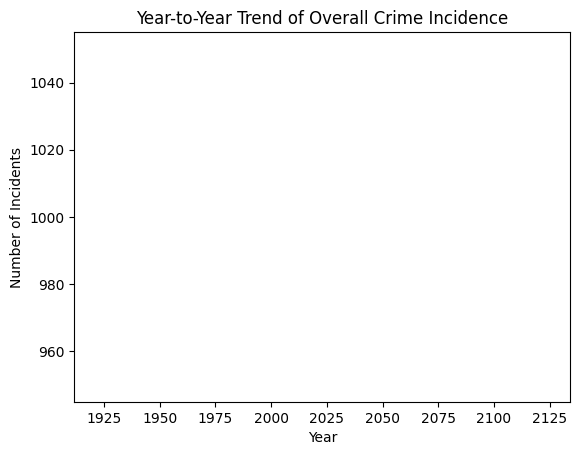

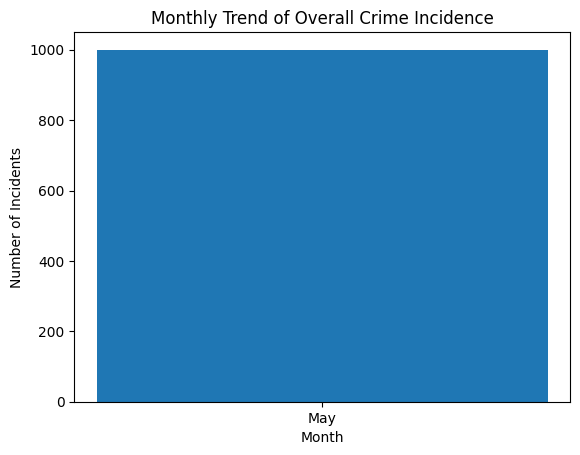

<function matplotlib.pyplot.show(close=None, block=None)>

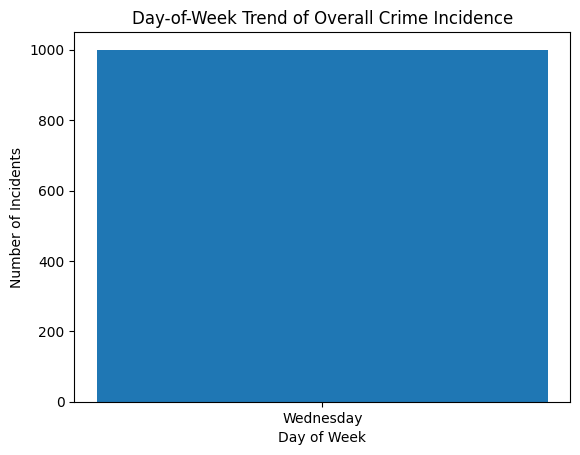

In [5]:
# Q2
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("911_calls.csv")

# Convert the "timeStamp" column to a datetime object
df["CrimeTime"] = pd.to_datetime(df["CrimeTime"])

# Create a new "Year" column
df["Year"] = df["CrimeTime"].dt.year

# Create a new "Month" column
df["Month"] = df["CrimeTime"].dt.month_name()

# Create a new "DayOfWeek" column
df["DayOfWeek"] = df["CrimeTime"].dt.day_name()

# Group the data by year and count the number of incidents
yearly_count = df.groupby("Year")["Description"].count()

# Plot the year-to-year trend of overall crime incidence
plt.plot(yearly_count.index, yearly_count.values)
plt.title("Year-to-Year Trend of Overall Crime Incidence")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

# Group the data by month and count the number of incidents
monthly_count = df.groupby("Month")["Description"].count()

# Plot the monthly trend of overall crime incidence
plt.bar(monthly_count.index, monthly_count.values)
plt.title("Monthly Trend of Overall Crime Incidence")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.show()

# Group the data by day of week and count the number of incidents
dow_count = df.groupby("DayOfWeek")["Description"].count()

# Plot the day-of-week trend of overall crime incidence
plt.bar(dow_count.index, dow_count.values)
plt.title("Day-of-Week Trend of Overall Crime Incidence")
plt.xlabel("Day of Week")
plt.ylabel("Number of Incidents")
plt.show

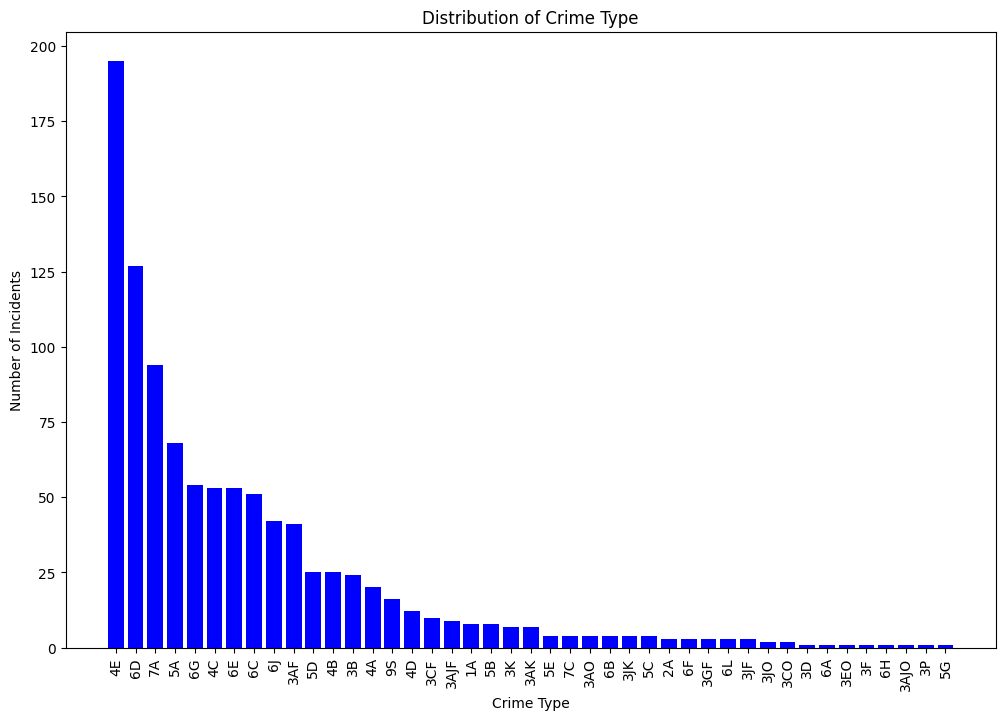

In [12]:
# Q3
import matplotlib.pyplot as plt

# Group the data by crime type and count the number of incidents
crime_type_count = df.groupby("CrimeCode")["Description"].count().sort_values(ascending=False)

# Create a bar chart of the crime type distribution
plt.figure(figsize=(12,8))
plt.bar(crime_type_count.index, crime_type_count.values, color='blue')
plt.title("Distribution of Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=90)
plt.show()



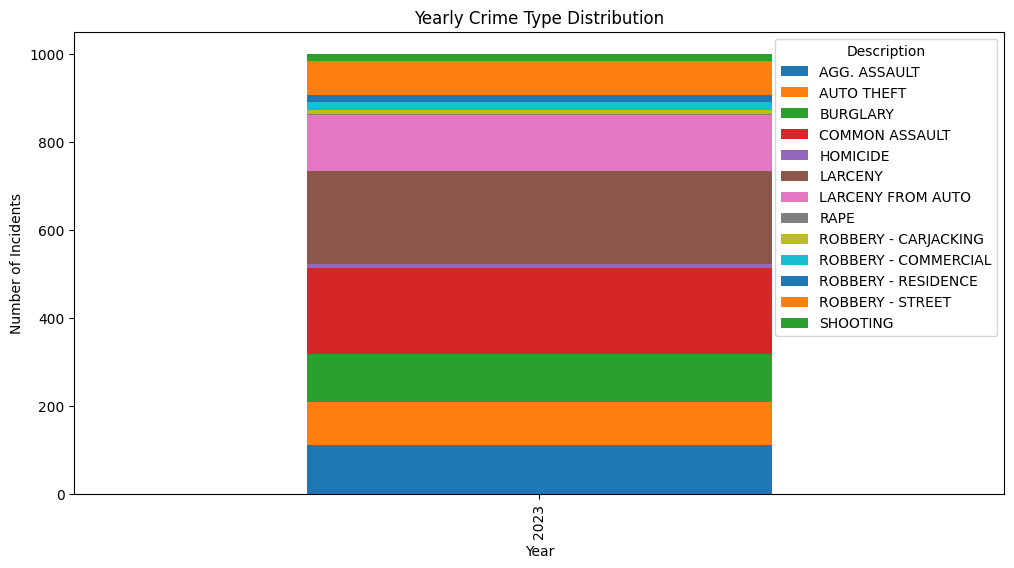

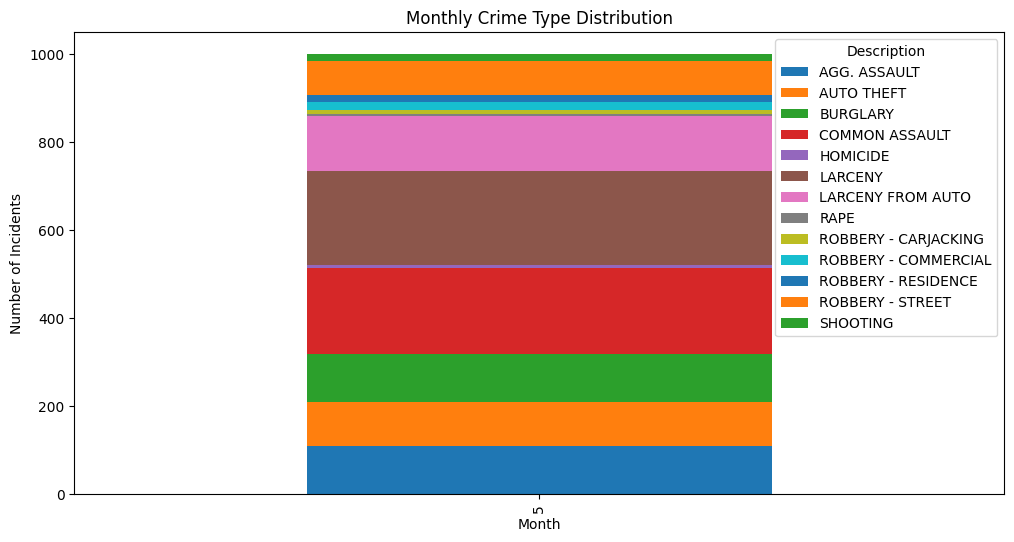

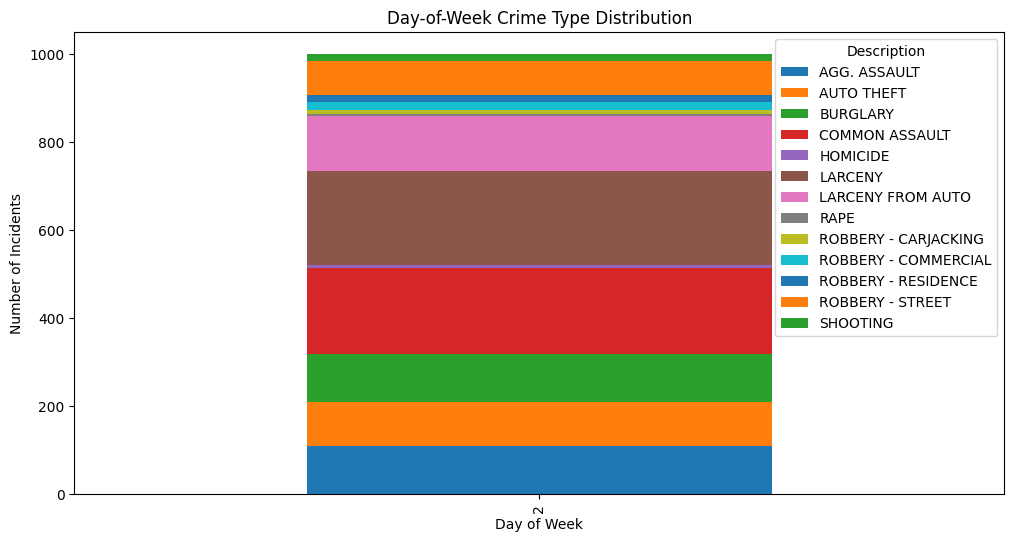

In [14]:
#Q4
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("911_calls.csv")

# Convert timeStamp column to datetime format
df["CrimeTime"] = pd.to_datetime(df["CrimeTime"])

# Add columns for year, month, and day of week
df["Year"] = df["CrimeTime"].dt.year
df["Month"] = df["CrimeTime"].dt.month
df["DayOfWeek"] = df["CrimeTime"].dt.dayofweek


# Year-to-year crime type distribution
yearly_crime_counts = df.groupby(["Year", "Description"])["Description"].count()
yearly_crime_counts.unstack().plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Yearly Crime Type Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

# Month-to-month crime type distribution
monthly_crime_counts = df.groupby(["Month", "Description"])["Description"].count()
monthly_crime_counts.unstack().plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Monthly Crime Type Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.show()

# Day-of-week crime type distribution
day_of_week_crime_counts = df.groupby(["DayOfWeek", "Description"])["Description"].count()
day_of_week_crime_counts.unstack().plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Day-of-Week Crime Type Distribution")
plt.xlabel("Day of Week")
plt.ylabel("Number of Incidents")
plt.show()